# 지도 학습 알고리즘 비교 보고서

## 1. 데이터셋 정보

* Data point 개수: 1484개
* Feature 개수: 9개 (8개 예측 변수, 1개 이름)
* Label 분포:

    * CYT (cytosolic or cytoskeletal): 463
    * NUC (nuclear): 429
    * MIT (mitochondrial): 244
    * ME3 (membrane protein, no N-terminal signal): 163
    * ME2 (membrane protein, uncleaved signal): 51
    * ME1 (membrane protein, cleaved signal): 44
    * EXC (extracellular): 37
    * VAC (vacuolar): 30
    * POX (peroxisomal): 20
    * ERL (endoplasmic reticulum lumen): 5

* 클래스 분포는 불균형하며, 특히 ERL, POX, VAC 클래스는 소수의 샘플로 구성되어 있습니다.

## 2. 평가지표 선정

본 과제는 다중 분류 문제이므로, 모델 성능 평가를 위해 다음과 같은 평가지표를 사용합니다.

* 정확도(Accuracy): 전체 샘플 중 정확하게 예측한 샘플의 비율
* 정밀도(Precision): 특정 클래스로 예측한 샘플 중 실제 그 클래스에 속하는 샘플의 비율
* 재현율(Recall): 실제 특정 클래스에 속하는 샘플 중 그 클래스로 예측한 샘플의 비율

클래스 불균형 문제를 고려하여, macro avg와 weighted 점수를 함께 사용하여 전체적인 성능과 클래스별 성능을 평가합니다.

## 3. 학습 알고리즘 비교

다음 3가지 지도 학습 알고리즘을 비교합니다.

* 로지스틱 회귀(Logistic Regression):
    * 선형 모델로서, 다중 클래스 분류에 적용 가능하며, 비교적 간단하고 해석이 용이합니다.
    * l2 규제를 사용하여 과적합을 방지하고, liblinear 또는 saga solver를 사용하여 모델을 학습합니다.
* 랜덤 포레스트(Random Forest):
    * 결정 트리를 기반으로 하는 앙상블 모델로, 과적합에 강하고 높은 예측 성능을 얻을 수 있습니다.
    * n_estimators, max_depth 등의 하이퍼파라미터를 조절하여 모델의 복잡도를 제어합니다.
* 서포트 벡터 머신(Support Vector Machine, SVM):
    * 고차원 공간에서 효과적으로 작동하며, 커널 트릭을 사용하여 비선형 분류를 수행할 수 있습니다.
    * C, kernel, gamma 등의 하이퍼파라미터를 조절하여 모델 성능을 최적화합니다.
    * 금일 학습한 내용이므로 복습 차원에서 활용해봅니다.

## 4. 하이퍼파라미터 탐색 범위

하이퍼파라미터 탐색 범위는 코드에 첨부되어 있으므로, 레포트에서는 생략합니다.

## 5. 최적 설정 제시

데이터 전처리, 학습 알고리즘, 하이퍼파라미터는 다음과 같이 설정합니다.

* 데이터 전처리: StandardScaler를 사용하여 특성 스케일링을 수행합니다.
* 학습 알고리즘: Random Forest가 가장 높은 정확도를 보였습니다.
* 하이퍼파라미터: Random Forest의 최적 하이퍼파라미터는 다음과 같습니다.
    * n_estimators: 100
    * max_depth: 10
    * min_samples_split: 2
    * class_weight: 'balanced'

## 6. 성능 개선 방안 논의

* 클래스 불균형 문제를 해결하기 위해 오버샘플링 또는 언더샘플링 기법을 적용합니다.
* 특성 선택 또는 차원 축소를 통해 모델의 복잡도를 줄이고 성능을 향상시킵니다.
* 다양한 모델을 앙상블하여 예측 성능을 높입니다.
* 더욱 다양한 하이퍼파라미터 조합을 탐색하고, 교차 검증 전략을 개선합니다.

# 코드

## 1. Data Load

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6369/3055226681.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('./yeast/yeast.data', sep='\s+', header=None)


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence Name  1484 non-null   object 
 1   mcg            1484 non-null   float64
 2   gvh            1484 non-null   float64
 3   alm            1484 non-null   float64
 4   mit            1484 non-null   float64
 5   erl            1484 non-null   float64
 6   pox            1484 non-null   float64
 7   vac            1484 non-null   float64
 8   nuc            1484 non-null   float64
 9   class          1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB
None

First 5 rows:
  Sequence Name   mcg   gvh   alm   mit  erl  pox   vac   nuc class
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR

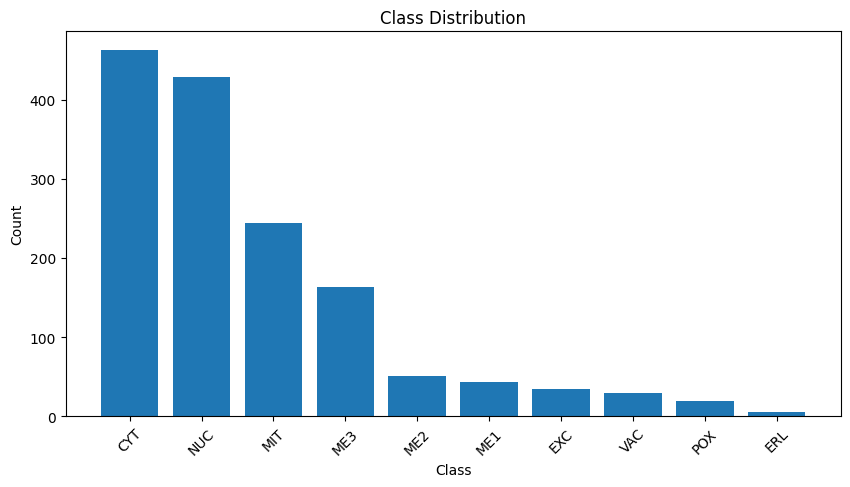


Raw Data:
     Sequence Name   mcg   gvh   alm   mit  erl  pox   vac   nuc class
0       ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1       ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2       ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3       AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4       AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
...            ...   ...   ...   ...   ...  ...  ...   ...   ...   ...
1479    YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22   ME2
1480    ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47   NUC
1481    ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22   ME2
1482    ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39   NUC
1483    G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22   CYT

[1484 rows x 10 columns]

Number of features: 9
Number of data points: 1484


In [11]:
# 데이터 로드
df = pd.read_csv('./yeast/yeast.data', sep='\s+', header=None)

# 컬럼명 지정 (yeast.text 파일 참고)
df.columns = ['Sequence Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class']

# 데이터 정보 확인
print("Data Info:")
print(df.info())

# 데이터의 첫 5행 확인
print("\nFirst 5 rows:")
print(df.head())

# 데이터 통계 정보 확인
print("\nData Description:")
print(df.describe())

# 클래스 분포 확인
print("\nClass Distribution:")
print(df['class'].value_counts())

# 클래스 분포 시각화 (matplotlib 사용)
class_counts = df['class'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(class_counts.index, class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Raw 데이터 확인 (전체 데이터프레임 출력)
print("\nRaw Data:")
print(df)

# Feature 개수 확인
num_features = len(df.columns) - 1  # 'class' 컬럼 제외
print(f"\nNumber of features: {num_features}")

# Data point 개수 확인
num_data_points = len(df)
print(f"Number of data points: {num_data_points}")

## 2. Data split

In [12]:
from sklearn.model_selection import train_test_split

# 특징 데이터 (X) 와 타겟 데이터 (y) 분리
X = df.drop(['Sequence Name', 'class'], axis=1)
y = df['class']

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 분리된 데이터의 형태 확인
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1187, 8)
X_test shape: (297, 8)
y_train shape: (1187,)
y_test shape: (297,)


## 3. Data Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

# 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일링된 데이터의 형태 확인
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# 스케일링된 데이터의 첫 5행 확인
print("\nX_train_scaled first 5 rows:")
print(X_train_scaled[:5])

print("\nX_test_scaled first 5 rows:")
print(X_test_scaled[:5])

X_train_scaled shape: (1187, 8)
X_test_scaled shape: (297, 8)

X_train_scaled first 5 rows:
[[-7.90342974e-01 -1.03748005e+00 -1.96887899e+00 -2.13060450e-01
  -1.01058231e-01 -1.07047135e-01  3.41363424e-01 -1.53559356e-01]
 [-1.29767917e+00  1.45102483e+00  1.18505940e-01 -7.32063463e-01
  -1.01058231e-01  1.01321672e+01  8.48495319e-01 -5.32509368e-01]
 [ 5.86712426e-01  2.46909566e-01 -1.96887899e+00  9.36941292e-03
  -1.01058231e-01 -1.07047135e-01  1.72319459e-01 -5.32509368e-01]
 [ 2.18119763e+00  2.57486574e+00 -1.15711818e+00  3.80085851e-01
  -1.01058231e-01 -1.07047135e-01  1.18658325e+00 -2.48296859e-01]
 [-8.62819574e-01 -1.51912615e+00  1.04623257e+00 -5.09633600e-01
  -1.01058231e-01 -1.07047135e-01 -6.72900366e-01 -5.32509368e-01]]

X_test_scaled first 5 rows:
[[-0.35548337 -0.55583394  0.11850594 -0.13891716 -0.10105823 -0.10704713
   0.67945135  0.50960316]
 [-1.44263237  0.00608651 -1.85291316  0.00936941 -0.10105823 -0.10704713
   0.17231946 -0.53250937]
 [-0.283006

## 4. Training

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 로지스틱 회귀
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000],
    'class_weight': ['balanced']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_search_lr.best_score_)

# 랜덤 포레스트
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', 'balanced_subsample']
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)
print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# SVM
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=3, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)
print("\nBest parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score for SVM:", grid_search_svm.best_score_)

/home/manamana32321/skku/25-1/데과프/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/manamana32321/skku/25-1/데과프/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/manamana32321/skku/25-1/데과프/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/manamana32321/skku/25-1/데과프/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/manamana32321/skku/25-1/데과프/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.5535012572987257

Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.611637471764054

Best parameters for SVM: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.5737288496782168


## 5. Evaluation

In [19]:
from sklearn.metrics import classification_report, accuracy_score

# 각 모델의 예측 성능 평가
models = [
    ('Logistic Regression', grid_search_lr.best_estimator_),
    ('Random Forest', grid_search_rf.best_estimator_),
    ('SVM', grid_search_svm.best_estimator_)
]

for name, model in models:
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)


--- Logistic Regression ---
Accuracy: 0.5623
Classification Report:
               precision    recall  f1-score   support

         CYT       0.54      0.55      0.54        93
         ERL       0.50      1.00      0.67         1
         EXC       0.36      0.71      0.48         7
         ME1       0.67      0.89      0.76         9
         ME2       0.38      0.30      0.33        10
         ME3       0.69      0.91      0.78        32
         MIT       0.53      0.63      0.58        49
         NUC       0.62      0.44      0.52        86
         POX       1.00      0.25      0.40         4
         VAC       0.00      0.00      0.00         6

    accuracy                           0.56       297
   macro avg       0.53      0.57      0.51       297
weighted avg       0.57      0.56      0.55       297


--- Random Forest ---
Accuracy: 0.6162
Classification Report:
               precision    recall  f1-score   support

         CYT       0.56      0.57      0.56        9